## ___
# Ciência dos Dados - PROJETO 1

Pedro Fonseca

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Objetivo: Comparar o acesso a TV para diferenetes faixas de renda na região sudeste.

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [176]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [177]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\OneDrive\Insper - Semestre 2\Ciência de Dados


In [178]:
#Se usar o arquivo descompactado
dados15=pd.read_csv('DOM2015.csv',sep=',')
dados14=pd.read_csv('DOM2014.csv',sep=',')
dados13=pd.read_csv('DOM2013.csv',sep=',')
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [179]:
dados15.loc[(dados15.UF>30)&(dados15.UF<36),"REGIAO"]="Sudeste"
dados15.loc[(dados15.V4105<4),"URBANIZACAO"]="Urbana"
dados15.loc[(dados15.V4105>3),"URBANIZACAO"]="Rural"
dados15.REGIAO=dados15.REGIAO.astype('category')
dados15.V4622=dados15.V4622.astype('category')#renda
dados15.V4622.cat.categories=('Sem Rendimento','até 0,25 SM','de 0,25 a 0,5 SM','de 0,5 a 1 SM','de 1 a 2 SM','de 2 a 3 SM','de 3 a 5 SM','mais que 5 SM','Não Disponível')
dados15.V4105=dados15.V4105.astype('category')#urbano/rural
dados15.V0226=dados15.V0226.astype('category')#tv em cores
dados15.V0226.cat.categories=('Sim','Não')
dados15.V02272=dados15.V02272.astype('category')#tv por assinatura
dados15.V02272.cat.categories=('Sim','Não')
dados15.V02273=dados15.V02273.astype('category')#tv aberta digital
dados15.V02273.cat.categories=('Sim','Não','Não sabe')
dados15.V02274=dados15.V02274.astype('category')#tv por parabólica
dados15.V02274.cat.categories=('Sim','Não','Não sabe')
dados15=dados15.loc[:,["REGIAO","URBANIZACAO","V4622","V0226","V02272","V02273","V02274"]]
dados15.columns=["REGIAO",'URBANIZACAO','RENDA','TV COM COR','TV POR ASSINATURA','TV ABERTA DIGITAL','TV POR PARABÓLICA']
dados15=dados15[(dados15.REGIAO=="Sudeste")]
dados15=dados15.dropna(subset=['TV COM COR'])
dados15=dados15[(dados15["TV COM COR"]=="Sim")]
dados15=dados15.loc[:,["URBANIZACAO","RENDA","TV POR ASSINATURA","TV ABERTA DIGITAL","TV POR PARABÓLICA"]]

In [180]:
dados14.loc[(dados14.UF>30)&(dados14.UF<36),"REGIAO"]="Sudeste"
dados14.loc[(dados14.V4105<4),"URBANIZACAO"]="Urbana"
dados14.loc[(dados14.V4105>3),"URBANIZACAO"]="Rural"
dados14.REGIAO=dados14.REGIAO.astype('category')
dados14.V4622=dados14.V4622.astype('category')#renda
dados14.V4622.cat.categories=('Sem Rendimento','até 0,25 SM','de 0,25 a 0,5 SM','de 0,5 a 1 SM','de 1 a 2 SM','de 2 a 3 SM','de 3 a 5 SM','mais que 5 SM','Não Disponível')
dados14.V4105=dados14.V4105.astype('category')#urbano/rural
dados14.V0226=dados14.V0226.astype('category')#tv em cores
dados14.V0226.cat.categories=('Sim','Não')
dados14.V02272=dados14.V02272.astype('category')#tv por assinatura
dados14.V02272.cat.categories=('Sim','Não')
dados14.V02273=dados14.V02273.astype('category')#tv aberta digital
dados14.V02273.cat.categories=('Sim','Não','Não sabe')
dados14.V02274=dados14.V02274.astype('category')#tv por parabólica
dados14.V02274.cat.categories=('Sim','Não','Não sabe')
dados14=dados14.loc[:,["REGIAO","URBANIZACAO","V4622","V0226","V02272","V02273","V02274"]]
dados14.columns=["REGIAO",'URBANIZACAO','RENDA','COR','TV POR ASSINATURA','TV ABERTA DIGITAL','TV POR PARABÓLICA']
dados14=dados14[(dados14.REGIAO=="Sudeste")]
dados14=dados14[(dados14.COR=="Sim")]
dados14=dados14.loc[:,["URBANIZACAO","RENDA","TV POR ASSINATURA","TV ABERTA DIGITAL","TV POR PARABÓLICA"]]

In [181]:
dados13.loc[(dados13.UF>30)&(dados13.UF<36),"REGIAO"]="Sudeste"
dados13.loc[(dados13.V4105<4),"URBANIZACAO"]="Urbana"
dados13.loc[(dados13.V4105>3),"URBANIZACAO"]="Rural"
dados13.REGIAO=dados13.REGIAO.astype('category')
dados13.V4622=dados13.V4622.astype('category')#renda
dados13.V4622.cat.categories=('Sem Rendimento','até 0,25 SM','de 0,25 a 0,5 SM','de 0,5 a 1 SM','de 1 a 2 SM','de 2 a 3 SM','de 3 a 5 SM','mais que 5 SM','Não Disponível')
dados13.V4105=dados13.V4105.astype('category')#urbano/rural
dados13.V0226=dados13.V0226.astype('category')#tv em cores
dados13.V0226.cat.categories=('Sim','Não')
dados13.V02272=dados13.V02272.astype('category')#tv por assinatura
dados13.V02272.cat.categories=('Sim','Não')
dados13.V02273=dados13.V02273.astype('category')#tv aberta digital
dados13.V02273.cat.categories=('Sim','Não','Não sabe')
dados13.V02274=dados13.V02274.astype('category')#tv por parabólica
dados13.V02274.cat.categories=('Sim','Não','Não sabe')
dados13=dados13.loc[:,["REGIAO","URBANIZACAO","V4622","V0226","V02272","V02273","V02274"]]
dados13.columns=["REGIAO",'URBANIZACAO','RENDA','TV COM COR','TV POR ASSINATURA','TV ABERTA DIGITAL','TV POR PARABÓLICA']
dados13=dados13[(dados13.REGIAO=="Sudeste")]
dados13=dados13.dropna(subset=['TV COM COR'])
dados13=dados13[(dados13["TV COM COR"]=="Sim")]
dados13=dados13.loc[:,["URBANIZACAO","RENDA","TV POR ASSINATURA","TV ABERTA DIGITAL","TV POR PARABÓLICA"]]

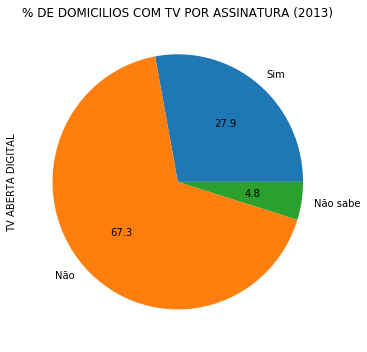

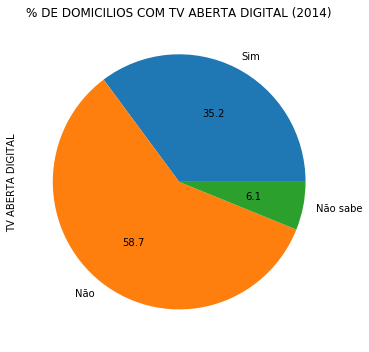

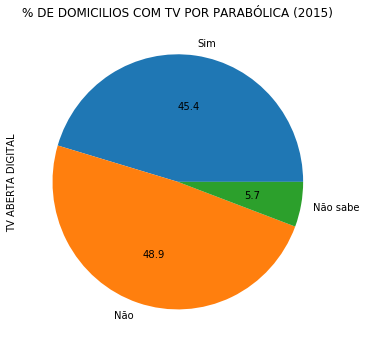

In [182]:
#grafico pizza
d13=(dados13["TV ABERTA DIGITAL"][dados13.RENDA=='de 0,5 a 1 SM'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig=plt.figure(figsize=(15, 5))
plt.subplot(131)
plot=d13.plot(kind='pie',title='% DE DOMICILIOS COM TV POR ASSINATURA (2013)',autopct='%.1f')                        
plt.tight_layout()
plt.show()

d14=(dados14["TV ABERTA DIGITAL"][dados14.RENDA=='de 0,5 a 1 SM'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig=plt.figure(figsize=(15, 5))
plt.subplot(131)
plot=d14.plot(kind='pie',title='% DE DOMICILIOS COM TV ABERTA DIGITAL (2014)',autopct='%.1f')                        
plt.tight_layout()
plt.show()

d15=(dados15["TV ABERTA DIGITAL"][dados15.RENDA=='de 0,5 a 1 SM'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig=plt.figure(figsize=(15, 5))
plt.subplot(131)
plot=d15.plot(kind='pie',title='% DE DOMICILIOS COM TV POR PARABÓLICA (2015)',autopct='%.1f')                        
plt.tight_layout()
plt.show()

In [183]:
#ct15=pd.crosstab(dados15["TV POR ASSINATURA"], dados15.REGIAO, margins=True, rownames=['INTERNET'], colnames=['REGIÃO'], normalize=True)*100
#ct15

In [184]:
#at=(pd.crosstab(dados15["TV POR ASSINATURA"], dados15["TV POR ASSINATURA"], margins=True, rownames=['ECONOMIA'], colnames=[''], normalize='index')*100).round(decimals=0)
#plot = at.iloc[0:7,].plot(kind='bar')
#plt.ylabel('Freq.Relativa (em %)')

In [185]:
#salvando o arquivo
writer = pd.ExcelWriter('projeto1.15.xlsx', engine='xlsxwriter')
dados15.to_excel(writer, sheet_name='Projeto1')
writer.save()
writer = pd.ExcelWriter('projeto1.14.xlsx', engine='xlsxwriter')
dados14.to_excel(writer, sheet_name='Projeto1')
writer.save()
writer = pd.ExcelWriter('projeto1.13.xlsx', engine='xlsxwriter')
dados13.to_excel(writer, sheet_name='Projeto1')
writer.save()

___
## Conclusão 

Descreva aqui suas conclusões!